In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from river import stream
from river import cluster
from river import metrics
from river import preprocessing


In [22]:
header = ["A0", "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10"]

In [23]:
data = pd.read_csv('./train_data.csv')
data.columns = header


In [24]:
data.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,368.000000,500.000000,0,0,0,0,1,0,0,5,5
1,368.000000,445.166667,0,0,0,0,1,0,1,5,5
2,346.125000,379.250000,0,0,0,0,1,1,1,5,5
3,344.900000,339.700000,1,2,2,0,1,2,1,7,6
4,380.833333,326.750000,1,2,2,0,1,2,2,7,6


# Correlation

<AxesSubplot:>

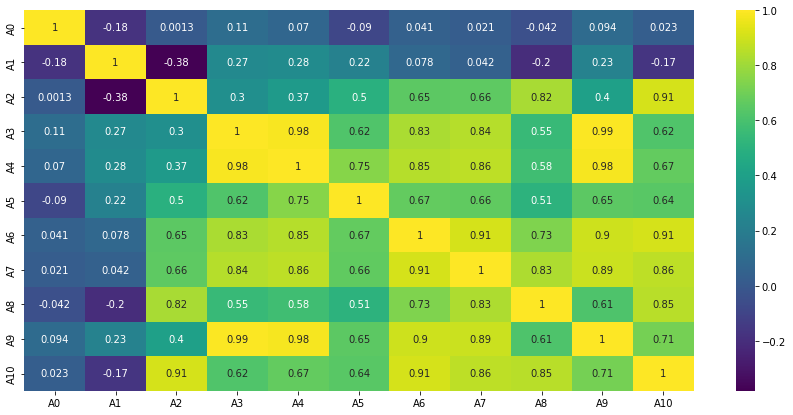

In [25]:
# correlation between feature
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(),cmap='viridis', annot=True)

# Clustering

In [26]:
silhouette_metrics = []

In [27]:
# Find the best K
for i in range(2, 11):
    k_means = cluster.KMeans(n_clusters=i, halflife=0.4, sigma=3, seed=0)
    metric = metrics.cluster.Silhouette()
    scaler = preprocessing.StandardScaler()

    for x in enumerate(stream.iter_pandas(data)):
        xi = x[1][0]
        k_means = k_means.learn_one(xi)
        y_pred = k_means.predict_one(xi)
        metric = metric.update(xi, y_pred, k_means.centers)

    silhouette_metrics.append(metric)

In [28]:
silhouette_metrics

[Silhouette: 1.,
 Silhouette: 0.029874,
 Silhouette: 0.029874,
 Silhouette: 0.029874,
 Silhouette: 0.029874,
 Silhouette: 0.029874,
 Silhouette: 0.029874,
 Silhouette: 0.029874,
 Silhouette: 0.029874]

In [30]:
y_preds = []

k_means = cluster.KMeans(n_clusters=4, halflife=0.4, sigma=3, seed=0)
scaler = preprocessing.StandardScaler()

for x in enumerate(stream.iter_pandas(data)):
    xi = x[1][0]
    x_scaler = scaler.learn_one(xi).transform_one(xi)
    k_means = k_means.learn_one(x_scaler)
    y_pred = k_means.predict_one(x_scaler)
    y_preds.append(y_pred)
    print(f'{x[0]}: {y_pred}')

0: 1
1: 2
2: 3
3: 3
4: 3
5: 3
6: 3
7: 3
8: 3
9: 3
10: 3
11: 3
12: 3
13: 3
14: 3
15: 3
16: 3
17: 3
18: 3
19: 0
20: 0
21: 0
22: 0
23: 0
24: 0
25: 0
26: 0
27: 0
28: 0
29: 0
30: 0
31: 0
32: 0
33: 0
34: 3
35: 3
36: 3
37: 3
38: 3
39: 3
40: 3
41: 3
42: 3
43: 3
44: 3
45: 3
46: 3
47: 3
48: 3
49: 3
50: 3
51: 3
52: 0
53: 0
54: 0
55: 0
56: 0
57: 0
58: 0
59: 0
60: 0
61: 0
62: 0
63: 0
64: 0
65: 0
66: 0
67: 0
68: 0
69: 0
70: 0
71: 0
72: 0
73: 0
74: 0
75: 0
76: 0
77: 0
78: 0
79: 0
80: 0
81: 0
82: 3
83: 3
84: 3
85: 2
86: 2
87: 2
88: 2
89: 2
90: 2
91: 2
92: 2
93: 2
94: 2
95: 2
96: 2
97: 2
98: 2
99: 2
100: 2
101: 2
102: 2
103: 2
104: 2
105: 2
106: 2
107: 2
108: 2
109: 2
110: 2
111: 2
112: 2
113: 2
114: 2
115: 2
116: 2
117: 2
118: 2
119: 2
120: 2
121: 2
122: 2
123: 2
124: 2
125: 2
126: 2
127: 2
128: 2
129: 2
130: 2
131: 2
132: 2
133: 2
134: 2
135: 2
136: 2
137: 2
138: 0
139: 0
140: 0
141: 0
142: 0
143: 0
144: 0
145: 0
146: 0
147: 0
148: 0
149: 0
150: 0
151: 0
152: 0
153: 0
154: 0
155: 0
156: 0
157: 0
158:

# Assign Labels

In [32]:
y_data = pd.DataFrame(y_preds)

In [44]:
data['Y'] = y_data

In [59]:
y_data[0].value_counts()

1    2204
0    2036
3     825
2     319
Name: 0, dtype: int64

In [45]:
data

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Y
0,368.000000,500.000000,0,0,0,0,1,0,0,5,5,1
1,368.000000,445.166667,0,0,0,0,1,0,1,5,5,2
2,346.125000,379.250000,0,0,0,0,1,1,1,5,5,3
3,344.900000,339.700000,1,2,2,0,1,2,1,7,6,3
4,380.833333,326.750000,1,2,2,0,1,2,2,7,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
5379,362.438356,412.630137,19,72,87,15,5,103,127,96,44,0
5380,363.081081,413.824324,19,74,90,16,5,105,129,98,44,0
5381,364.780000,413.726667,19,75,91,16,6,107,132,105,49,0
5382,365.651316,413.907895,19,78,94,16,6,109,135,107,49,0


In [47]:
data.groupby(data['Y']).mean()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
Y,,,,,,,,,,,
0,386.745340,394.619686,9.681238,17.762279,25.927800,8.165521,2.529961,30.835953,22.618861,30.303536,22.326621
1,379.638332,371.780727,5.795826,9.576225,11.347550,1.771325,2.070780,21.340290,14.327132,19.875681,16.145644
2,367.402712,382.177395,7.253918,21.689655,27.056426,5.366771,2.639498,29.012539,20.510972,34.764890,20.442006
3,400.203873,355.317093,9.786667,23.832727,26.633939,2.801212,2.815758,41.298182,32.067879,37.797576,23.860606


In [60]:
mean_collected_coin = list(data.groupby(['Y']).mean()['A2'])
mean_enemies_kills = list(data.groupby(['Y']).mean()['A3'])
print(mean_enemies_kills)
print(mean_collected_coin)

[17.762278978389, 9.57622504537205, 21.689655172413794, 23.832727272727272]
[9.681237721021612, 5.795825771324864, 7.253918495297806, 9.786666666666667]


In [61]:
labels = []
num_labels = len(mean_collected_coin)
for i in range(num_labels):
    if i % 2 == 0:
        sorted_index = np.argsort(mean_collected_coin)
    else:
        sorted_index = np.argsort(mean_enemies_kills)

    sorted_index = list(sorted_index)
    sorted_index.reverse()
    for max_index in sorted_index:
        if max_index not in labels:
            labels.append(max_index)
            break

print(labels)

LABELS = {
    labels[0]: 'Hardcore Achiever',
    labels[1]: 'Hardcore Killer',
    labels[2]: 'Casual Achiever',
    labels[3]: 'Casual Killer',
}

LABELS

[3, 2, 0, 1]


{3: 'Hardcore Achiever',
 2: 'Hardcore Killer',
 0: 'Casual Achiever',
 1: 'Casual Killer'}

### Compare with original model
```
label: [0 1 2 3]
counts: [162 127  93  45]
[2, 3, 1, 0]
{2: 'Hardcore Achiever', 3: 'Hardcore Killer', 1: 'Casual Achiever', 0: 'Casual Killer'}
```

```
label: [0 1 2 3]
counts: [2036 2204 319 825]   
[3, 2, 0, 1]
{3: 'Hardcore Achiever',2: 'Hardcore Killer',0: 'Casual Achiever',1: 'Casual Killer'}
```

# Samve model

In [19]:
with open('model.pkl', 'wb') as f:
    pickle.dump(k_means, f)

# Load model

In [21]:
with open('./model.pkl', 'rb') as f:
    model = pickle.load(f)